In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from rdkit.Chem import Descriptors

Path to file.

In [2]:
root = Path("datasets") / "bacteria_copolymers"
filename = "copolymers.csv"

Read the file.

In [3]:
data = pd.read_csv(root / "raw" / filename, index_col=0)
data["ID"] = data.index
data

,smiles_monomer_1,smiles_monomer_2,ratio_1,ratio_2,LogF_PA,isFluo_PA,LogF_SA,isFluo_SA,LogF_UPEC,isFluo_UPEC,ID
id,,,,,,,,,,,
10,C=C(C)C(=O)OCCOC(=O)CCCCCO,C=C(C)C(=O)OCCOC(=O)CCCCCO,100,0,6.150725,1,6.594127,1,3.484008,1,10
10A(10%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,90,10,6.490622,1,6.566150,1,0.000000,0,10A(10%)
10A(15%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,85,15,6.521727,1,6.610802,1,0.000000,0,10A(15%)
10A(20%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,80,20,6.603623,1,6.635112,1,0.000000,0,10A(20%)
10A(25%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,75,25,7.078178,1,6.546750,1,0.000000,0,10A(25%)
...,...,...,...,...,...,...,...,...,...,...,...
9F(10%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,90,10,7.043009,1,6.815466,1,0.000000,0,9F(10%)
9F(15%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,85,15,6.808102,1,6.433999,1,0.000000,0,9F(15%)
9F(20%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,80,20,6.835791,1,6.446260,1,0.000000,0,9F(20%)


Define the target variable to model.

isFluo_UPEC
0    297
1    195
Name: count, dtype: int64


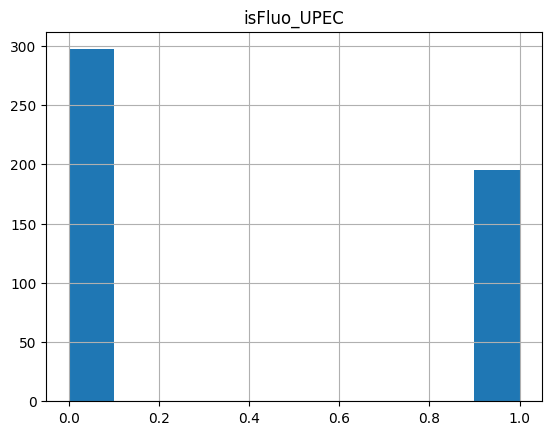

In [4]:
target_variable = "isFluo_UPEC"
data.hist(target_variable)
print(data[target_variable].value_counts())

## TML Stuff

### Calculate the descriptors

In [5]:
from polynet.featurizer.descriptor_calculation import calculate_descriptors

Calculate the descriptors.

In [6]:
smiles = (
    data["smiles_monomer_1"].unique().tolist()
    + data["smiles_monomer_2"].unique().tolist()
)
descriptors, columns = calculate_descriptors(smiles_list=smiles)

Create the descriptors of the polymer. This is done by getting the descriptors of each monomer, weighting them by the relative abudance and add them.

In [7]:
columns = [name for name, _ in Descriptors.descList]
descriptor_df = pd.DataFrame(columns=columns)

for i, row in data.iterrows():
    monomer1 = row["smiles_monomer_1"]
    ratio1 = row["ratio_1"]
    monomer2 = row["smiles_monomer_2"]
    ratio2 = row["ratio_2"]

    descriptors_monomer1 = np.array(descriptors[monomer1]) * ratio1 / 100
    descriptors_monomer2 = np.array(descriptors[monomer2]) * ratio2 / 100

    values = descriptors_monomer1 + descriptors_monomer2

    descriptor_df.loc[i] = values

data = pd.concat([data, descriptor_df], axis=1)
data

,smiles_monomer_1,smiles_monomer_2,ratio_1,ratio_2,LogF_PA,isFluo_PA,LogF_SA,isFluo_SA,LogF_UPEC,isFluo_UPEC,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
10,C=C(C)C(=O)OCCOC(=O)CCCCCO,C=C(C)C(=O)OCCOC(=O)CCCCCO,100,0,6.150725,1,6.594127,1,3.484008,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
10A(10%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,90,10,6.490622,1,6.566150,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0
10A(15%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,85,15,6.521727,1,6.610802,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0
10A(20%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,80,20,6.603623,1,6.635112,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.0
10A(25%),C=C(C)C(=O)OCCOC(=O)CCCCCO,C=CC(=O)OCCOCCOCCOCCOCCOCCOCCO,75,25,7.078178,1,6.546750,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9F(10%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,90,10,7.043009,1,6.815466,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9F(15%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,85,15,6.808102,1,6.433999,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9F(20%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,80,20,6.835791,1,6.446260,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9F(25%),C=CC(=O)OCCOCCOc1ccc(Cc2ccc(OCCOCCOC(=O)C=C)cc...,C=CC(=O)Oc1cccc(OC(=O)C=C)c1,75,25,6.823016,1,6.539090,1,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# isfluo = np.where(data[target_variable] < 1, 0, 1).tolist()
isfluo = data[target_variable].tolist()

In [10]:
from polynet.utils.data_preprocessing import class_balancer, print_class_balance

In [11]:
train_set, test_set = train_test_split(
    data[columns + [target_variable]], test_size=0.2, stratify=isfluo, random_state=1
)

print_class_balance(train_set, target_variable)
print_class_balance(test_set, target_variable)

CLASS BALANCE
[1]: 156  [0]: 237  (0.40/0.60)
CLASS BALANCE
[1]: 39  [0]: 60  (0.39/0.61)


In [12]:
train_set = class_balancer(
    data=train_set, target=target_variable, desired_class_proportion=0.6
)
y_train = train_set[target_variable].tolist()
train_set = train_set.drop(columns=[target_variable])
y_test = test_set[target_variable].tolist()
test_set = test_set.drop(columns=[target_variable])

Samples to remove: 4
CLASS BALANCE
[1]: 156  [0]: 233  (0.40/0.60)


### Feature Selection

In [13]:
from polynet.featurizer.feature_selection import uncorrelated_features, diversity_filter

In [14]:
train_set = uncorrelated_features(train_set)
train_set = diversity_filter(train_set)
test_set = test_set[train_set.columns]
train_set

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWLOW,...,EState_VSA1,EState_VSA2,EState_VSA3,EState_VSA4,VSA_EState1,VSA_EState5,VSA_EState7,VSA_EState8,FractionCSP3,MolLogP
5B(20%),11.061583,0.159526,-0.291467,0.524617,29.379394,229.13080,0.329861,-0.459838,1.186061,9.725049,...,0.000000,12.046339,10.525489,19.842547,6.290248,1.039211,6.005763,9.792874,0.748718,3.205040
9C(10%),10.931326,0.188900,-0.464404,0.212668,11.713665,468.72940,0.329716,-0.488253,0.631677,10.029729,...,13.109112,13.755263,36.998539,38.936196,30.670214,0.453580,2.972989,9.718763,0.364706,3.397970
11C(15%),10.840407,0.338491,-0.410202,0.270889,12.326449,340.02555,0.329643,-0.462351,0.671920,10.135263,...,13.694363,2.794313,35.360860,46.177656,20.772171,-0.809994,7.139402,10.589109,0.663725,2.731855
12A(30%),11.653182,0.052628,-0.822582,0.307152,11.133217,332.78360,0.329688,-0.463163,0.757343,10.141984,...,21.907319,17.838581,23.784775,10.329234,21.408900,-1.283360,1.799735,12.094436,0.640809,1.370530
15D(10%),11.372776,0.110857,-1.346330,0.350310,10.376190,298.70560,0.334544,-0.461093,0.809524,9.895050,...,25.282612,17.838581,6.993943,16.405254,22.066125,-3.625316,3.236383,10.387009,0.405455,1.648430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5E(25%),10.889280,0.175589,-0.298291,0.470371,22.781818,197.04100,0.329846,-0.460050,1.359091,9.891755,...,0.000000,10.547280,5.712963,17.311056,5.122836,0.271975,4.785193,8.871530,0.733173,2.657200
1B(10%),10.736911,0.204621,-0.452670,0.292048,12.750649,302.52930,0.329715,-0.460307,0.643506,10.535913,...,10.744750,13.086249,38.773911,13.354290,23.545160,-0.511666,2.700896,9.079759,0.580952,0.719460
2A(25%),10.775660,0.148382,-0.461078,0.272910,10.773352,320.37175,0.329722,-0.460091,0.796703,10.128856,...,10.446284,17.275007,39.641292,10.633035,24.368491,-0.808117,1.939905,11.629135,0.655882,1.080025
5C(10%),11.039882,0.123565,-0.305299,0.514704,26.876522,221.92420,0.329889,-0.459488,1.257391,9.730259,...,2.364363,12.728820,6.194868,18.740881,6.907577,0.335488,5.378445,10.604741,0.757014,3.212480


### Data Preparation

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
train_set_scaled = pd.DataFrame(
    scaler.fit_transform(train_set), columns=train_set.columns
)
test_set_scaled = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

### Recursive Feature Selection

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import StratifiedKFold
from polynet.featurizer.feature_selection import SFS

In [18]:
logsitic = LogisticRegression()

scorer = make_scorer(matthews_corrcoef)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

selector = RFECV(logsitic, step=1, cv=cv, n_jobs=-1, min_features_to_select=5)
selector = selector.fit(train_set_scaled, y_train)

In [19]:
import matplotlib.pyplot as plt

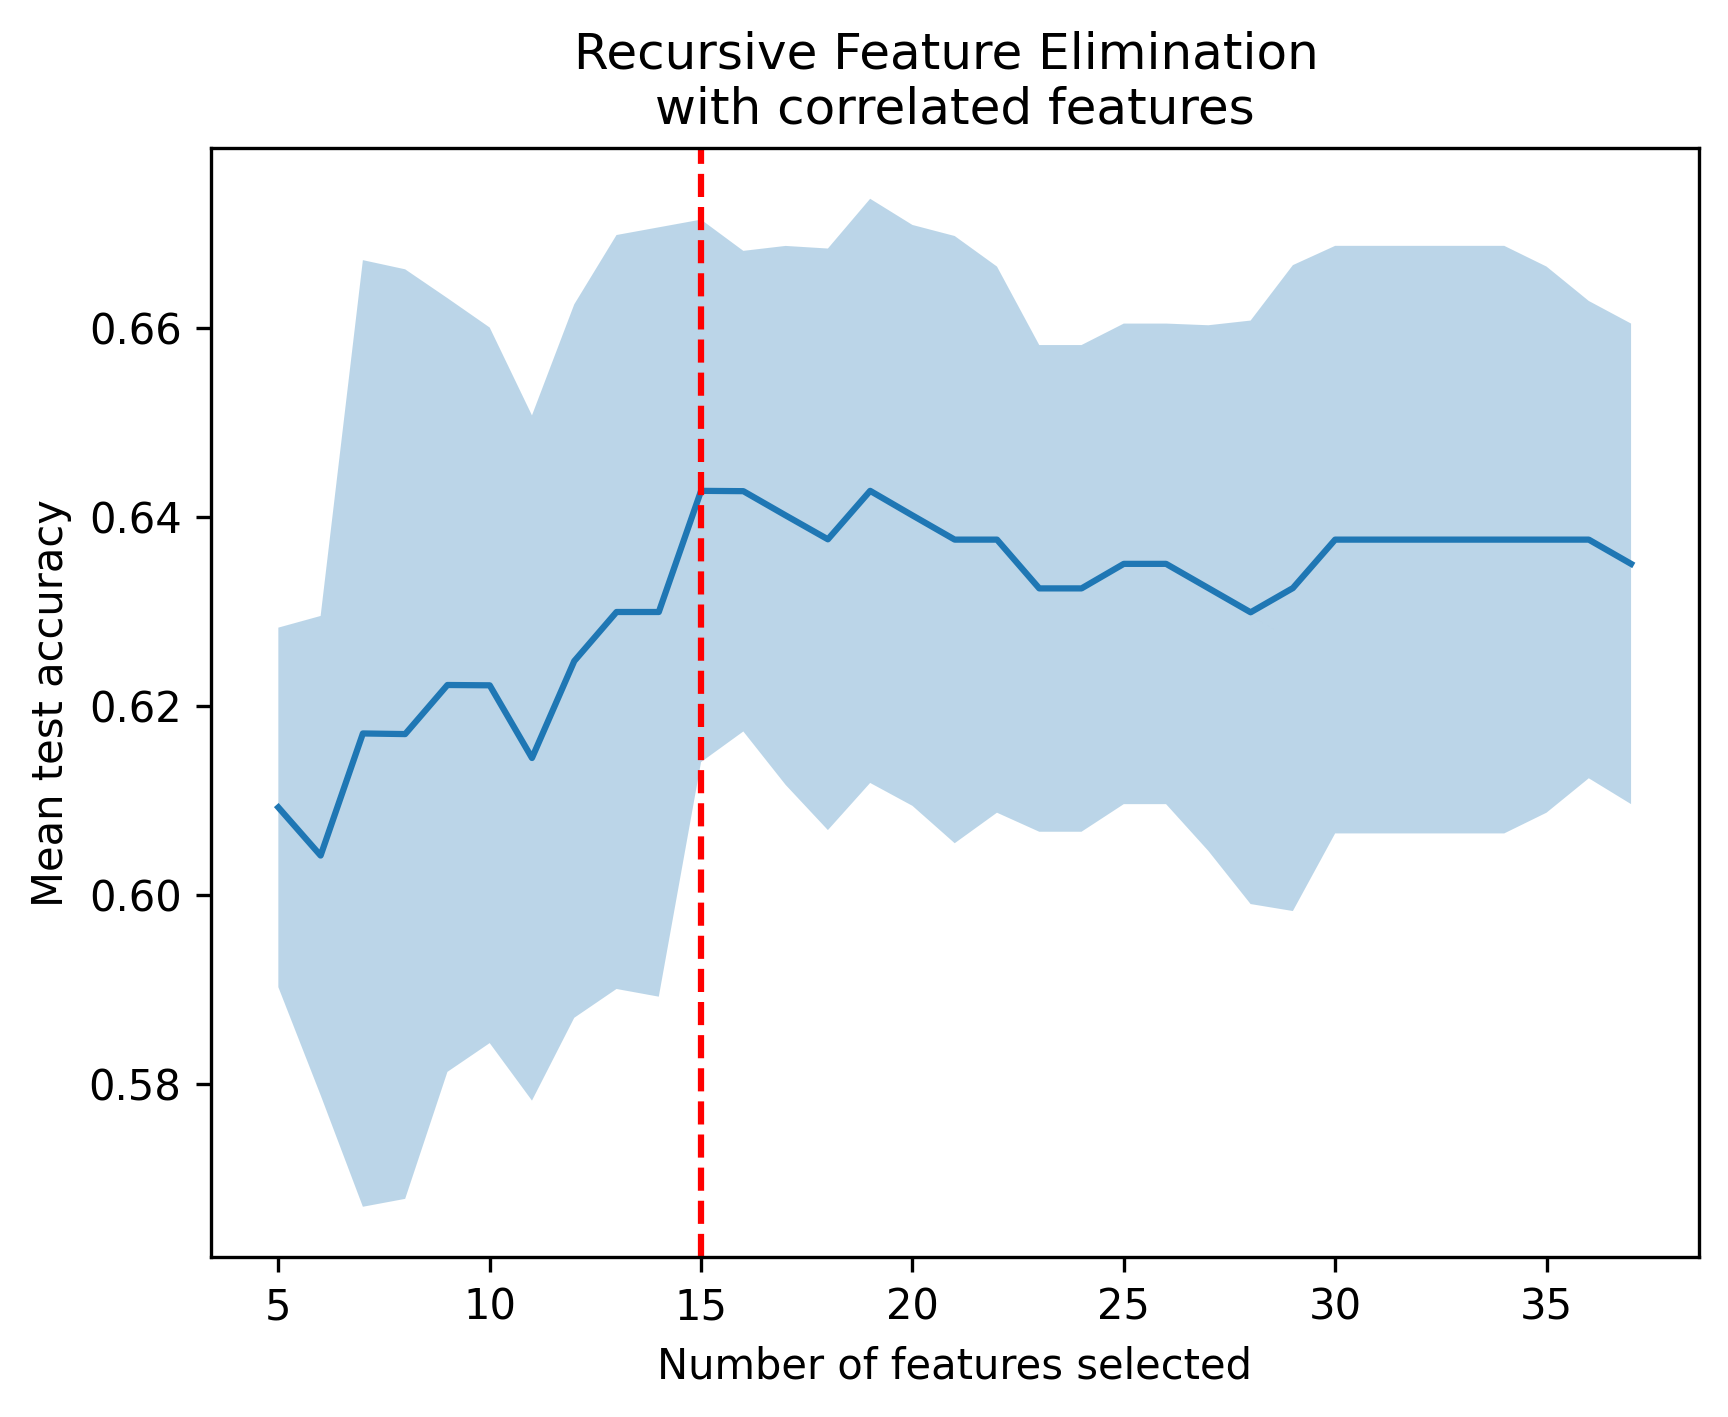

In [20]:
cv_results = pd.DataFrame(selector.cv_results_)

plt.figure(dpi=300)
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")

plt.plot(cv_results["n_features"], cv_results["mean_test_score"])
plt.fill_between(
    cv_results["n_features"],
    cv_results["mean_test_score"] - cv_results["std_test_score"],
    cv_results["mean_test_score"] + cv_results["std_test_score"],
    alpha=0.3,
)

plt.axline(
    (selector.n_features_, min(cv_results["mean_test_score"])),
    (selector.n_features_, max(cv_results["mean_test_score"])),
    color="red",
    linestyle="--",
)


plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [21]:
features = selector.get_feature_names_out()
features

array(['MinEStateIndex', 'qed', 'SPS', 'MinPartialCharge',
       'FpDensityMorgan1', 'BCUT2D_LOGPHI', 'HallKierAlpha', 'Ipc',
       'PEOE_VSA10', 'PEOE_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA3',
       'EState_VSA4', 'VSA_EState7'], dtype=object)

In [22]:
estimator = LogisticRegression()
estimator.fit(train_set_scaled[features], y_train)
y_pred_train = estimator.predict(train_set_scaled[features])
y_pred_test = estimator.predict(test_set_scaled[features])

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

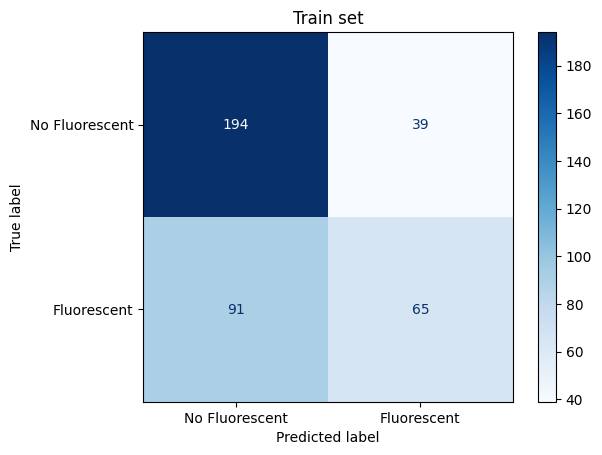

In [24]:
plt.Figure(dpi=300)
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred_train,
    display_labels=["No Fluorescent", "Fluorescent"],
    cmap=plt.cm.Blues,
)

plt.title("Train set")
plt.show()

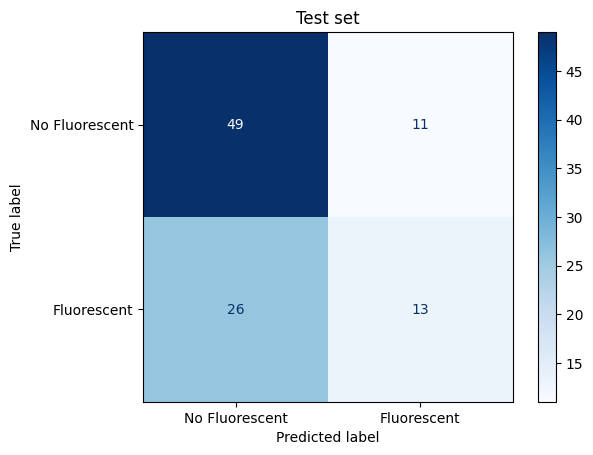

In [25]:
plt.Figure(dpi=300)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred_test,
    display_labels=["No Fluorescent", "Fluorescent"],
    cmap=plt.cm.Blues,
)


plt.title("Test set")
plt.show()

## GNN Stuff

In [26]:
from polynet.featurizer.graph_representation.copolymers import CoPolyGraph
from polynet.options.enums import (
    Networks,
    Optimizers,
    Schedulers,
    Pooling,
    ProblemTypes,
    Split_types,
)

In [27]:
dataset = CoPolyGraph(
    filename=filename,
    root=root,
    smiles_col=["smiles_monomer_1", "smiles_monomer_2"],
    target_col=target_variable,
    id_col="id",
    ratio_col="ratio_1",
)

In [28]:
dataset[0]

Data(x=[34, 56], edge_index=[2, 64], y=1.0, weight_monomer=[34, 1], mols=[2], idx='10')

In [29]:
train_set, val_set = train_test_split(
    train_set,
    stratify=y_train,
    test_size=0.2,
    random_state=1,
)

In [30]:
train_ids = train_set.index
val_ids = val_set.index
test_ids = test_set.index

In [31]:
train_set = [data for data in dataset if data.idx in train_ids]
val_set = [data for data in dataset if data.idx in val_ids]
test_set = [data for data in dataset if data.idx in test_ids]

In [32]:
from polynet.call_methods import (
    create_network,
    make_optimizer,
    make_loss,
    make_scheduler,
)
from polynet.utils.model_training import (
    plot_training_curve,
    predict_network,
    plot_parity_plot,
    train_model,
)
from copy import deepcopy
from torch_geometric.loader import DataLoader
import torch

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = create_network(
    Networks.GCN,
    improved=True,
    n_node_features=dataset[0].num_node_features,
    n_edge_features=dataset[0].num_edge_features,
    pooling=Pooling.GlobalAddPool,
    n_convolutions=2,
    embedding_dim=132,
    readout_layers=3,
    problem_type=ProblemTypes.Classification,
    n_classes=2,
    dropout=0.01,
    seed=42,
)
optimizer = make_optimizer(Optimizers.Adam, model, lr=0.001)
loss = make_loss(model.problem_type)
scheduler = make_scheduler(
    Schedulers.ReduceLROnPlateau, optimizer, step_size=15, gamma=0.9, min_lr=1e-8
)

train_loader, val_loader, test_loader = (
    DataLoader(train_set, batch_size=32, shuffle=True),
    DataLoader(val_set, batch_size=32, shuffle=False),
    DataLoader(test_set, batch_size=32, shuffle=False),
)

In [34]:
predictions = train_model(
    model, train_loader, val_loader, test_loader, loss, optimizer, scheduler, device
)

Epoch: 001, LR: 0.001000, Train Loss: 0.6620, Val Loss: 0.6687, Test Loss: 0.6687
Epoch: 002, LR: 0.001000, Train Loss: 0.6352, Val Loss: 0.6643, Test Loss: 0.6669
Epoch: 003, LR: 0.001000, Train Loss: 0.6145, Val Loss: 0.6730, Test Loss: 0.6707
Epoch: 004, LR: 0.001000, Train Loss: 0.5950, Val Loss: 0.6536, Test Loss: 0.6393
Epoch: 005, LR: 0.001000, Train Loss: 0.5984, Val Loss: 0.6387, Test Loss: 0.6355
Epoch: 006, LR: 0.001000, Train Loss: 0.5995, Val Loss: 0.6529, Test Loss: 0.6369
Epoch: 007, LR: 0.001000, Train Loss: 0.5900, Val Loss: 0.6663, Test Loss: 0.6439
Epoch: 008, LR: 0.001000, Train Loss: 0.5897, Val Loss: 0.7234, Test Loss: 0.7106
Epoch: 009, LR: 0.001000, Train Loss: 0.5910, Val Loss: 0.6672, Test Loss: 0.6439
Epoch: 010, LR: 0.001000, Train Loss: 0.5761, Val Loss: 0.6313, Test Loss: 0.6200
Epoch: 011, LR: 0.001000, Train Loss: 0.5899, Val Loss: 0.6490, Test Loss: 0.6451
Epoch: 012, LR: 0.001000, Train Loss: 0.5801, Val Loss: 0.6875, Test Loss: 0.6662
Epoch: 013, LR: 

In [35]:
predictions_test = predictions.loc[predictions["Set"] == "Test"]
predictions_train = predictions.loc[predictions["Set"] == "Train"]
predictions_val = predictions.loc[predictions["Set"] == "Validation"]

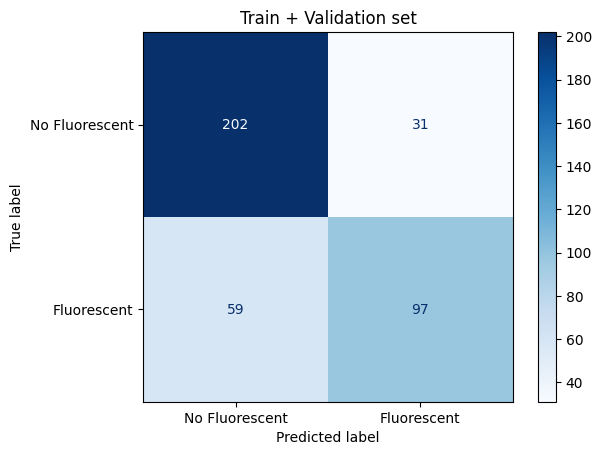

In [36]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=predictions_train["True"].tolist() + predictions_val["True"].tolist(),
    y_pred=predictions_train["Predicted"].tolist()
    + predictions_val["Predicted"].tolist(),
    display_labels=["No Fluorescent", "Fluorescent"],
    cmap=plt.cm.Blues,
)
plt.title("Train + Validation set")
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix

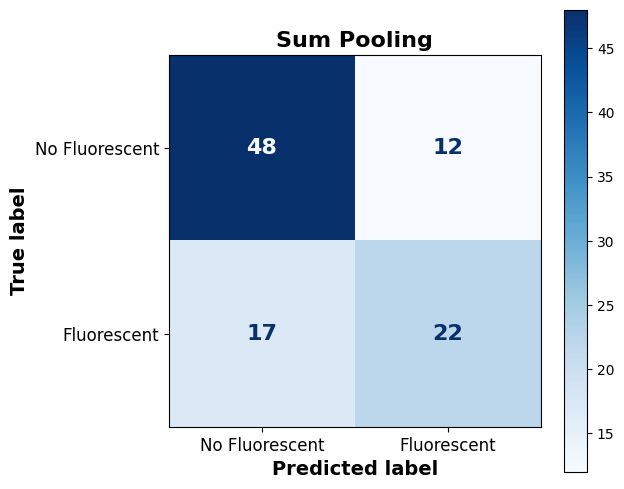

In [39]:
disp = ConfusionMatrixDisplay(
    confusion_matrix(
        y_true=predictions_test["True"], y_pred=predictions_test["Predicted"]
    ),
    display_labels=["No Fluorescent", "Fluorescent"],
)

# Customize the figure size
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size if needed
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format="d")  # Use 'd' for integer values

# Increase label font size
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=12,
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12,
)

# Increase number (value) font size
for text in ax.texts:
    text.set_fontsize(16)  # Increase number size
    text.set_fontweight("bold")  # Make numbers bold

ax.set_ylabel("True label", fontsize=14, fontweight="bold")
ax.set_xlabel("Predicted label", fontsize=14, fontweight="bold")

plt.title("Sum Pooling", fontsize=16, fontweight="bold")
plt.show()

In [39]:
from torch_geometric.explain import (
    Explainer,
    CaptumExplainer,
    GNNExplainer,
    ModelConfig,
)
import captum

/Users/ed_aguilar/miniconda3/envs/polynet/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
model_config = ModelConfig(
    mode="multiclass_classification",
    task_level="graph",
    return_type="raw",
)

In [53]:
explainer = Explainer(
    model=model,
    algorithm=CaptumExplainer(attribution_method=captum.attr.ShapleyValueSampling),
    explanation_type="model",
    node_mask_type="attributes",
    edge_mask_type=None,
    model_config=model_config,
)

In [54]:
from polynet.explain.explain_mol import plot_mols_with_weights
from rdkit import Chem

In [55]:
results_path = Path("results") / "explanations" / "UPEC"
results_path.mkdir(parents=True, exist_ok=True)

tp_path = results_path / "True Positive"
tp_path.mkdir(parents=True, exist_ok=True)

fp_path = results_path / "False Positive"
fp_path.mkdir(parents=True, exist_ok=True)

tn_path = results_path / "True Negative"
tn_path.mkdir(parents=True, exist_ok=True)

fn_path = results_path / "False Negative"
fn_path.mkdir(parents=True, exist_ok=True)

In [56]:
import matplotlib.colors as mcolors
import seaborn as sns

# Define a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Define a softer blue and red
soft_blue = "#40bcde"  # Light blue
soft_red = "#e64747"  # Light red

# Create a new colormap with less intense colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "soft_bwr", [soft_blue, "white", soft_red]
)

In [57]:
for mol in test_set:

    prediction = explainer.get_prediction(
        x=mol.x,
        edge_index=mol.edge_index,
        batch_index=None,
        edge_attr=None,
        edge_weight=None,
        monomer_weight=mol.weight_monomer,
    )

    prediction = prediction.argmax().item()
    true = mol.y.item()

    if prediction == 1 and true == 1:
        path = tp_path
    elif prediction == 0 and true == 1:
        path = fn_path
    elif prediction == 1 and true == 0:
        path = fp_path
    else:
        path = tn_path

    print("Analyzing molecule", mol.idx)
    print("Predicted", prediction, "True", true)
    print("Saving Explanation to", path)

    explanation = explainer(
        x=mol.x,
        edge_index=mol.edge_index,
        batch_index=None,
        edge_attr=None,
        edge_weight=None,
        monomer_weight=mol.weight_monomer,
    )

    masks = explanation.node_mask

    masks = masks.sum(axis=1).detach().numpy()
    masks /= np.abs(masks).max()
    masks = masks.tolist()

    masks_molecules = []
    ia = 0

    for smiles in mol.mols:
        molecule = Chem.MolFromSmiles(smiles)
        num_atoms = molecule.GetNumAtoms()
        masks_molecules.append(masks[ia : ia + num_atoms])
        ia += num_atoms

    plot_mols_with_weights(
        mol.mols,
        masks_molecules,
        save_path=path / f"{mol.idx}.png",
        cbar=True,
        colormap=custom_cmap,
    )

Analyzing molecule 10A(15%)
Predicted 1 True 0.0
Saving Explanation to results/explanations/UPEC/False Positive
Analyzing molecule 10A(25%)
Predicted 0 True 0.0
Saving Explanation to results/explanations/UPEC/True Negative
Analyzing molecule 10A(30%)
Predicted 0 True 1.0
Saving Explanation to results/explanations/UPEC/False Negative
Analyzing molecule 10C(25%)
Predicted 1 True 0.0
Saving Explanation to results/explanations/UPEC/False Positive
Analyzing molecule 10D(10%)
Predicted 0 True 0.0
Saving Explanation to results/explanations/UPEC/True Negative
Analyzing molecule 10F(20%)
Predicted 1 True 1.0
Saving Explanation to results/explanations/UPEC/True Positive
Analyzing molecule 10F(25%)
Predicted 1 True 0.0
Saving Explanation to results/explanations/UPEC/False Positive
Analyzing molecule 11B(30%)
Predicted 1 True 0.0
Saving Explanation to results/explanations/UPEC/False Positive
Analyzing molecule 11C(10%)
Predicted 0 True 0.0
Saving Explanation to results/explanations/UPEC/True Negat

<Figure size 640x480 with 0 Axes>

In [54]:
mol = test_set[0]

explanation = explainer(
    x=mol.x,
    edge_index=mol.edge_index,
    batch_index=None,
    edge_attr=None,
    edge_weight=None,
    monomer_weight=mol.weight_monomer,
)

In [56]:
masks = explanation.node_mask
masks /= abs(masks).max()
masks = masks.sum(axis=1).detach().numpy().tolist()
len(masks)

43

In [57]:
masks_molecules = []

ia = 0
for smiles in mol.mols:
    molecule = Chem.MolFromSmiles(smiles)
    num_atoms = molecule.GetNumAtoms()
    masks_molecules.append(masks[ia : ia + num_atoms])
    ia = num_atoms

In [58]:
len(masks_molecules)

2

In [63]:
predictions.loc[predictions["Index"].str.contains("14B")]

,Predicted,True,Index,Set
27,1,1.0,14B(10%),Train
39,1,1.0,14B(25%),Train


In [64]:
import seaborn as sns

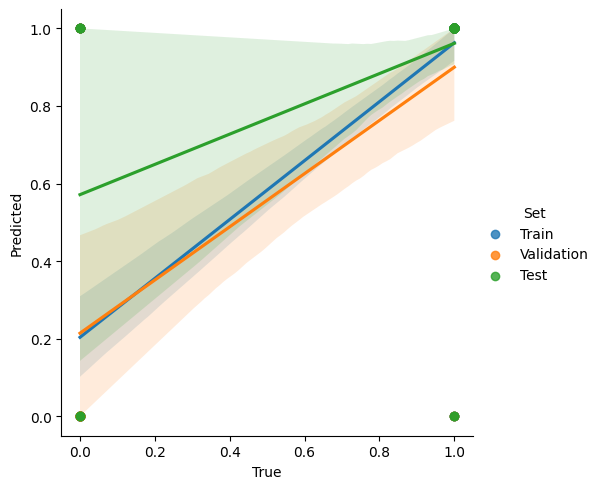

In [65]:
sns.lmplot(x="True", y="Predicted", data=predictions, hue="Set")

In [66]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np


def compute_tanimoto_similarity(smiles_series: pd.Series) -> pd.DataFrame:
    """
    Computes the Tanimoto similarity between all molecules in a Pandas Series of SMILES.
    Returns a DataFrame with:
    - 'Index': Index of the original molecule.
    - 'SMILES': Original SMILES.
    - 'Most_Similar_Index': Index of the most similar molecule.
    - 'Most_Similar_SMILES': SMILES of the most similar molecule.
    - 'Similarity_Score': Tanimoto similarity between the molecule and its most similar counterpart.

    Args:
        smiles_series (pd.Series): Pandas Series containing SMILES strings.

    Returns:
        pd.DataFrame: DataFrame with similarity results.
    """

    # Convert SMILES to RDKit Molecules
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_series]

    fpgen = AllChem.GetMorganGenerator(radius=2)

    # Generate Morgan fingerprints (radius=2, size=2048)
    fps = [fpgen.GetSparseCountFingerprint(mol) if mol else None for mol in mols]

    # Initialize similarity matrix
    num_mols = len(fps)
    similarity_matrix = np.zeros((num_mols, num_mols))

    # Compute pairwise Tanimoto similarity
    for i in range(num_mols):
        for j in range(i + 1, num_mols):  # Avoid redundant calculations
            if fps[i] is not None and fps[j] is not None:
                similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity

    # Find the most similar molecule for each one
    most_similar_smiles = []
    most_similar_indices = []
    similarity_scores = []

    for i in range(num_mols):
        if fps[i] is None:  # Skip invalid molecules
            most_similar_smiles.append(None)
            most_similar_indices.append(None)
            similarity_scores.append(None)
            continue

        # Get index of most similar molecule (excluding itself)
        most_similar_idx = np.argmax(
            similarity_matrix[i, :i].tolist()
            + [0]
            + similarity_matrix[i, i + 1 :].tolist()
        )
        most_similar_score = similarity_matrix[i, most_similar_idx]

        # Store results
        most_similar_smiles.append(smiles_series.iloc[most_similar_idx])
        most_similar_indices.append(smiles_series.index[most_similar_idx])
        similarity_scores.append(most_similar_score)

    # Create result DataFrame
    result_df = pd.DataFrame(
        {
            "Index": smiles_series.index,
            "SMILES": smiles_series.values,
            "Most_Similar_Index": most_similar_indices,
            "Most_Similar_SMILES": most_similar_smiles,
            "Similarity_Score": similarity_scores,
        }
    )

    return result_df

In [67]:
similarity = compute_tanimoto_similarity(data["smiles"])
similarity.sample(5)

KeyError: 'smiles'

In [ ]:
similarity

,Index,SMILES,Most_Similar_Index,Most_Similar_SMILES,Similarity_Score
0,0,COCCOCCOCCOC(=O)C(C)=C,2,COCCOCCOC(=O)C(C)=C,0.795455
1,1,CC(C)(COC(=O)C=C)COC(=O)C(C)(C)COC(=O)C=C,45,O=C(C(C)(C)COC(CCCCCOC(C=C)=O)=O)OCC(C)(C)COC(...,0.523810
2,2,COCCOCCOC(=O)C(C)=C,0,COCCOCCOCCOC(=O)C(C)=C,0.795455
3,3,O=C(C(C)=C)OC(C1=CC=CC=C1)C2=CC=CC=C2,32,CC(=C)C(=O)OCc1ccccc1,0.406250
4,4,O=C(C=C)N([H])CCCOC,82,CN(C)CCCNC(=O)C=C,0.555556
...,...,...,...,...,...
79,79,CC(C(NCCC[NH3+])=O)=C.[Cl-],77,CC(C(NCC[NH3+])=O)=C.[Cl-],0.758621
80,80,CCN(CC)CCOC(=O)C=C,74,CCN(CC)CCOC(=O)C(C)=C,0.609756
81,81,CN(C)CCOC(=O)C(C)=C,74,CCN(CC)CCOC(=O)C(C)=C,0.589744
82,82,CN(C)CCCNC(=O)C=C,72,CN(C)CCCNC(=O)C(C)=C,0.578947


In [ ]:
similarity.loc[50]

Index                                                       50
SMILES                 CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F
Most_Similar_Index                                          44
Most_Similar_SMILES        CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F
Similarity_Score                                          0.74
Name: 50, dtype: object

In [ ]:
from polynet.call_methods import (
    create_network,
    make_optimizer,
    make_loss,
    make_scheduler,
    Split_Generator,
)
from polynet.utils.model_training import (
    train_network,
    eval_network,
    plot_training_curve,
    predict_network,
    plot_parity_plot,
    train_model,
)
from copy import deepcopy
from torch_geometric.loader import DataLoader
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
splits = Split_Generator(Split_types.LeaveOneOut, 32)
loaders_generator = splits.split_data(
    dataset,
    test_split_indices=similarity["Index"],
    val_split_indices=similarity["Most_Similar_Index"],
)

In [ ]:
preds = pd.DataFrame(columns=["Predicted", "True", "Index"])

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(len(dataset))):
    model = create_network(
        Networks.GCN,
        improved=True,
        n_node_features=dataset[0].num_node_features,
        n_edge_features=dataset[0].num_edge_features,
        pooling=Pooling.GlobalMeanPool,
        n_convolutions=1,
        embedding_dim=50,
        readout_layers=2,
        problem_type=ProblemTypes.Regression,
        dropout=0.5,
        seed=42,
    )
    optimizer = make_optimizer(Optimizers.Adam, model, lr=0.01)
    loss = make_loss(model.problem_type)
    scheduler = make_scheduler(
        Schedulers.ReduceLROnPlateau, optimizer, step_size=7, gamma=0.7, min_lr=1e-8
    )
    train_loader, val_loader, test_loader = next(loaders_generator)
    predictions_test = train_model(
        model, train_loader, val_loader, test_loader, loss, optimizer, scheduler, device
    )

    preds = pd.concat([preds, predictions_test])

  0%|          | 0/84 [00:00<?, ?it/s]/var/folders/zg/xtb15b093xj3jbsfsxdg5tmm0000gn/T/ipykernel_83465/3480066269.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  preds = pd.concat([preds, predictions_test])
100%|██████████| 84/84 [19:26<00:00, 13.88s/it]


In [ ]:
preds

,Predicted,True,Index
0,1.567178,1.455082,0
0,1.914383,1.503112,1
0,1.340402,1.524246,2
0,2.634500,1.568758,3
0,1.833545,1.595148,4
...,...,...,...
0,2.671833,3.329744,79
0,2.136865,3.477867,80
0,2.318111,3.515420,81
0,2.870314,3.611054,82


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_parity(df):
    sns.lmplot(
        x="True",
        y="Predicted",
        data=df,
    )
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

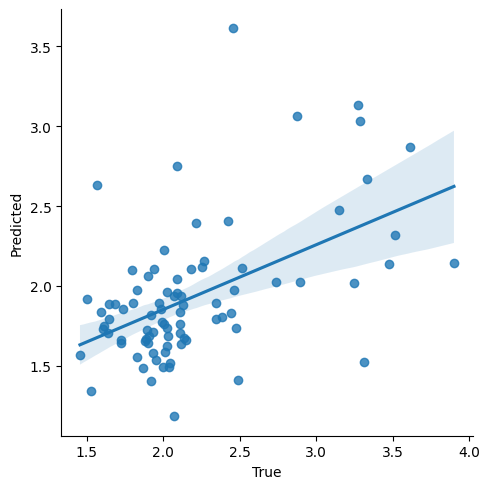

In [ ]:
plot_parity(preds)

In [ ]:
preds.to_csv("results/predictions_exp4.csv", index=False)

<Axes: xlabel='Error', ylabel='Count'>

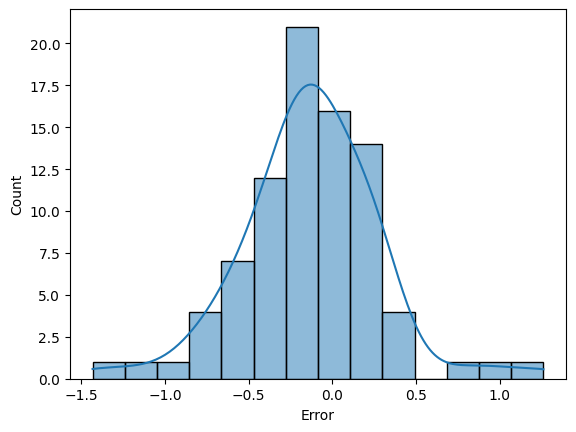

In [ ]:
preds["Error"] = preds["Predicted"] - preds["True"]
sns.histplot(preds["Error"], kde=True)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [ ]:
def calculate_metrics(df):
    rmse = sqrt(mean_squared_error(df["True"], df["Predicted"]))
    r2 = r2_score(df["True"], df["Predicted"])
    mae = mean_absolute_error(df["True"], df["Predicted"])
    return rmse, r2, mae

In [ ]:
calculate_metrics(preds)

(0.42464826488236956, 0.3694779872894287, 0.31480374932289124)

In [ ]:
calculate_metrics(preds.loc[preds["Error"] < 2])

(0.4254738984512692, 0.3735867738723755, 0.3270222544670105)

In [ ]:
calculate_metrics(preds.loc[preds["Error"] < 1])

(0.41180775890900945, 0.4184843897819519, 0.3181082010269165)

In [ ]:
from torch.utils.data import Subset

In [ ]:
test_loader = DataLoader(Subset(dataset, [50]))
val_loader = DataLoader(Subset(dataset, [44]))
train_dataset = [i for i in range(len(dataset)) if i not in [50, 44]]

train_loader = DataLoader(Subset(dataset, train_dataset), batch_size=32, shuffle=True)

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.1022,  0.1109, -0.0313,  ...,  0.1096,  0.0385,  0.0554],
                      [ 0.0423, -0.0023,  0.1046,  ..., -0.0851,  0.1336,  0.0252],
                      [ 0.0412, -0.1246, -0.0878,  ..., -0.0200, -0.0612,  0.1148],
                      ...,
                      [-0.0018, -0.0305, -0.0284,  ...,  0.0406, -0.1215, -0.0280],
                      [-0.0433,  0.1020, -0.1287,  ...,  0.1210, -0.0470,  0.0633],
                      [ 0.0222,  0.0745,  0.0466,  ...,  0.0355,  0.0448, -0.0470]])),
             ('linear.bias',
              tensor([ 0.1081, -0.0205, -0.0208,  0.1044,  0.0234,  0.0715,  0.0788, -0.0875,
                      -0.0017,  0.1180, -0.0826,  0.0175,  0.0993,  0.0148, -0.0300,  0.0483,
                      -0.1105,  0.1098,  0.1050, -0.0374, -0.0483, -0.0261,  0.1330, -0.0513,
                       0.0400, -0.1269,  0.0404,  0.0810,  0.0433, -0.0063,  0.0098,  0.1157,
                       0.0581,

In [ ]:
train_list = []
val_list = []
test_list = []

best_val_loss = float("inf")

for epoch in range(1, 250):
    train_loss = train_network(model, train_loader, loss, optimizer, device)
    val_loss = eval_network(model, val_loader, loss, device)
    test_loss = eval_network(model, test_loader, loss, device)

    train_list.append(train_loss)
    val_list.append(val_loss)
    test_list.append(test_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        best_model_state = deepcopy(model.state_dict())

    scheduler.step(val_loss)

    print(
        f"Epoch: {epoch:03d}, LR: {scheduler.get_last_lr()[0]:3f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}"
    )

Epoch: 001, LR: 0.000001, Train Loss: 2.0616, Val Loss: 1.7542, Test Loss: 1.7412
Epoch: 002, LR: 0.000001, Train Loss: 2.0512, Val Loss: 1.7695, Test Loss: 1.7404
Epoch: 003, LR: 0.000001, Train Loss: 2.0552, Val Loss: 1.7728, Test Loss: 1.7475
Epoch: 004, LR: 0.000001, Train Loss: 2.0606, Val Loss: 1.7983, Test Loss: 1.7777
Epoch: 005, LR: 0.000001, Train Loss: 2.0632, Val Loss: 1.8041, Test Loss: 1.7895
Epoch: 006, LR: 0.000001, Train Loss: 2.0475, Val Loss: 1.7889, Test Loss: 1.7732
Epoch: 007, LR: 0.000001, Train Loss: 2.0566, Val Loss: 1.7745, Test Loss: 1.7589
Epoch: 008, LR: 0.000001, Train Loss: 2.0480, Val Loss: 1.7933, Test Loss: 1.7740
Epoch: 009, LR: 0.000001, Train Loss: 2.0574, Val Loss: 1.7946, Test Loss: 1.7832
Epoch: 010, LR: 0.000001, Train Loss: 2.0333, Val Loss: 1.7691, Test Loss: 1.7532
Epoch: 011, LR: 0.000001, Train Loss: 2.0591, Val Loss: 1.7354, Test Loss: 1.7210
Epoch: 012, LR: 0.000000, Train Loss: 2.0528, Val Loss: 1.7157, Test Loss: 1.6963
Epoch: 013, LR: 

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0537,  0.1109, -0.0313,  ...,  0.1096,  0.0385, -0.0148],
                      [ 0.2340, -0.0023,  0.1046,  ..., -0.0851,  0.1336,  0.1262],
                      [-0.1382, -0.1246, -0.0878,  ..., -0.0200, -0.0612,  0.1898],
                      ...,
                      [ 0.1124, -0.0305, -0.0284,  ...,  0.0406, -0.1215,  0.1104],
                      [-0.1337,  0.1020, -0.1287,  ...,  0.1210, -0.0470,  0.0456],
                      [ 0.0312,  0.0745,  0.0466,  ...,  0.0355,  0.0448,  0.0109]])),
             ('linear.bias',
              tensor([ 8.3665e-03,  7.2618e-03, -4.8246e-02,  7.2526e-02,  7.7183e-02,
                       9.9321e-02,  1.8209e-01, -5.9704e-02, -9.3234e-02,  1.6796e-01,
                      -1.3413e-01, -5.5890e-02,  1.0589e-01, -7.5701e-02, -9.8467e-02,
                      -1.6434e-01, -1.6488e-01,  6.2091e-02,  1.4503e-01, -1.5090e-01,
                       1.8935e-02, -1.0769e-01,  1.4247e-0

In [ ]:
model.reset_parameters()

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.1022,  0.1109, -0.0313,  ...,  0.1096,  0.0385,  0.0554],
                      [ 0.0423, -0.0023,  0.1046,  ..., -0.0851,  0.1336,  0.0252],
                      [ 0.0412, -0.1246, -0.0878,  ..., -0.0200, -0.0612,  0.1148],
                      ...,
                      [-0.0018, -0.0305, -0.0284,  ...,  0.0406, -0.1215, -0.0280],
                      [-0.0433,  0.1020, -0.1287,  ...,  0.1210, -0.0470,  0.0633],
                      [ 0.0222,  0.0745,  0.0466,  ...,  0.0355,  0.0448, -0.0470]])),
             ('linear.bias',
              tensor([ 0.1081, -0.0205, -0.0208,  0.1044,  0.0234,  0.0715,  0.0788, -0.0875,
                      -0.0017,  0.1180, -0.0826,  0.0175,  0.0993,  0.0148, -0.0300,  0.0483,
                      -0.1105,  0.1098,  0.1050, -0.0374, -0.0483, -0.0261,  0.1330, -0.0513,
                       0.0400, -0.1269,  0.0404,  0.0810,  0.0433, -0.0063,  0.0098,  0.1157,
                       0.0581,

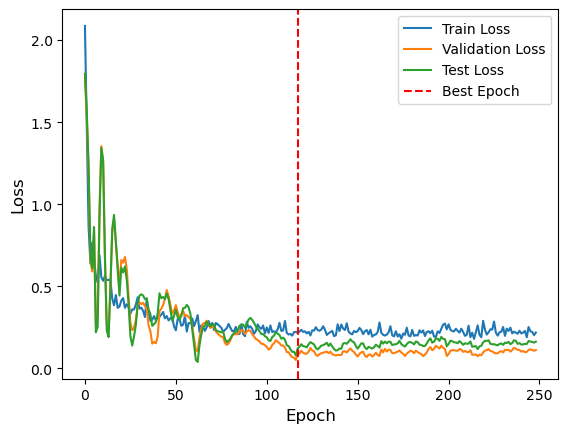

In [ ]:
plot_training_curve(train_list, val_list, test_list, best_epoch)

In [ ]:
model.load_state_dict(best_model_state)

<All keys matched successfully>

In [ ]:
results = pd.DataFrame(columns=["True", "Predicted"])

In [ ]:
train_preds = predict_network(model, train_loader, device)
train_preds["set"] = "Train"
val_preds = predict_network(model, val_loader, device)
val_preds["set"] = "Val"
test_preds = predict_network(model, test_loader, device)
test_preds["set"] = "Test"
all_preds = pd.concat([train_preds, val_preds, test_preds])

In [ ]:
all_preds

,Predicted,True,Index,set
0,2.333618,2.443396,65,Train
1,1.960487,1.830606,17,Train
2,1.464004,1.524246,2,Train
3,3.324409,3.477867,80,Train
4,1.545218,1.827145,16,Train
...,...,...,...,...
79,2.001377,1.884407,20,Train
80,1.845669,2.132719,55,Train
81,1.864315,2.087007,47,Train
0,2.018507,2.070073,44,Val


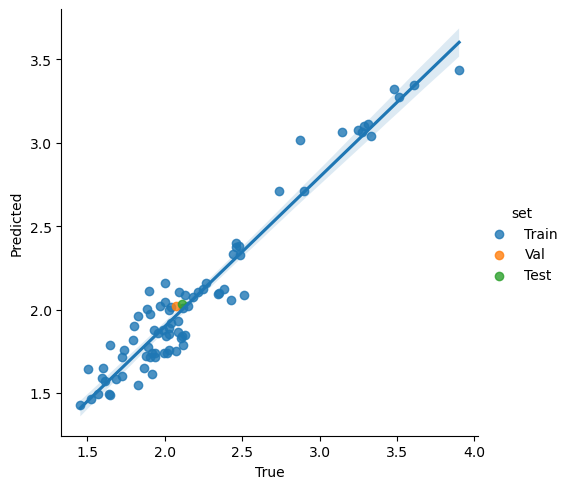

In [ ]:
plot_parity_plot(all_preds)

In [ ]:
a = True
b = False

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
np.

In [ ]:
plt.Figure(dpi=300)

plt.scatter(np.random(10), np.random(10))

TypeError: 'module' object is not callable